In [70]:
import os
import pydicom
import numpy
import glob
import uuid

def generate_uid():
    u=uuid.uuid4()
    i = 0
    for c in u.bytes:
        i *= 256
        i += ord(c)
    return "2.25.{}".format(i)

studyUid = generate_uid()

patientName = "Smith^James^^^"

ctPath = "C:/tobbe/testct/*.dcm"
ctOut = "c:/tobbe/test/cropped/"
petPath = "C:/tobbe/testpet/*.dcm"
petOut = "c:/tobbe/test/croppedPet/"
regPath = "C:/tobbe/"

patientId = "21231666"

def showImage(pixelData):
    %pylab notebook
    imshow(pixelData)

def changeRegFile():
    regName = "REGjamesSmith.dcm"
    ds = pydicom.read_file(regPath + regName)
    ds.PatientID = patientId
    ds.SOPInstanceUID = generate_uid()
    ds.PatientName = patientName
    ds.StudyInstanceUID = studyUid
    print petOut + regName
    ds.save_as(petOut + regName)
    
def readFiles(path):
    allDs = []
    dcmFiles = glob.glob(path)
    for file in dcmFiles:
        ds = pydicom.read_file(file)
        allDs.append({"ds":ds, "name":os.path.basename(file)})
    return allDs;

def cullImageStack(allDs, outPath):
    first = True
    seriesUid = generate_uid()
    for dsDict in allDs:
        ds = dsDict['ds']
        xStart = int(ds.Rows/4 + 0.0001)
        yStart = int(ds.Columns/4 + 0.0001)
        w = int(ds.Rows/2 + 0.0001)
        h = int(ds.Columns/2 + 0.0001)

        croppedPixelData = ds.pixel_array[xStart:xStart+h, yStart:yStart+w]
        ds.PixelData = croppedPixelData.tobytes()
        ds.Rows = h
        ds.Columns = w
        ds.ImagePositionPatient[0] = ds.ImagePositionPatient[0] + ds.PixelSpacing[1] * w
        ds.ImagePositionPatient[1] = ds.ImagePositionPatient[1] + ds.PixelSpacing[0] * h
        ds.PatientName = patientName
        ds.PatientID = patientId

        ds.StudyInstanceUID = studyUid;
        ds.SeriesInstanceUID = seriesUid
        ds.SOPInstanceUID = generate_uid()
        if first:
            #showImage(ds.pixel_array)
            first = False
        ds.save_as(outPath + dsDict['name'])


In [71]:
ctDs = readFiles(ctPath)
cullImageStack(ctDs, ctOut)
petDs = readFiles(petPath)
cullImageStack(petDs, petOut)
changeRegFile()

c:/tobbe/test/croppedPet/REGjamesSmith.dcm


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


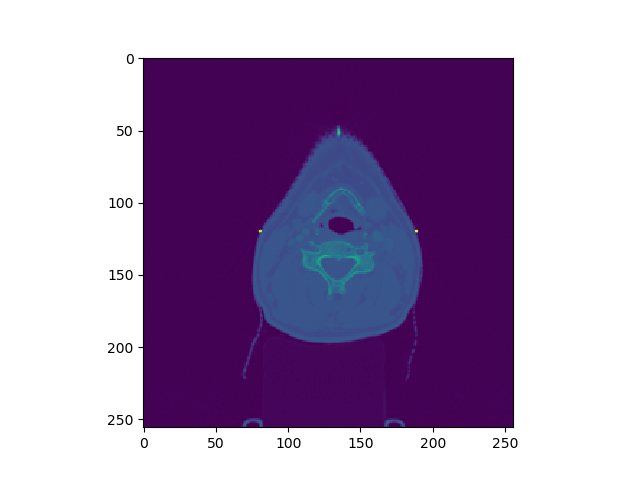

In [67]:
ds.PixelData = croppedPixelData.tobytes()
ds.Rows = h
ds.Columns = w
ds.ImagePositionPatient[0] = ds.ImagePositionPatient[0] + ds.PixelSpacing[1] * w
ds.ImagePositionPatient[1] = ds.ImagePositionPatient[1] + ds.PixelSpacing[0] * h

ds.save_as('c:/tobbe/test/cropped/test.dcm')